In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import torchvision
import numpy as np
import PIL

from torchvision import transforms

from k12libs.utils.nb_easy import k12ai_set_notebook
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from k12libs.utils.nb_dataset import ImageJsonFileDataset

In [3]:
k12ai_set_notebook(cellw=100)

In [4]:
mean = (
    0.485,
    0.456,
    0.406,
)
std = (
    0.229,
    0.224,
    0.225,
)
datadir = os.path.join(K12AI_DATASETS_ROOT, 'cv', 'cifar10')
jfiles = ['train.json', 'val.json', 'test.json']

-----

## <div align="center"> Transforms and Display </div>

### Raw Image

In [5]:
class NullTransform(object):
    def __call__(self, inputs):
        return inputs
    
    
class Denormalize(object):
    def __init__(self, mean, std, inplace=False):
        self.demean = [-m/s for m, s in zip(mean, std)]
        self.destd = [1/s for s in std]
        self.inplace = inplace

    def __call__(self, tensor):
        tensor = transforms.Normalize(self.demean, self.destd, self.inplace)(tensor)
        return torch.clamp(tensor, 0.0, 1.0)
        

In [6]:
dataset = ImageJsonFileDataset(datadir=datadir, jfiles=jfiles, transform=NullTransform())

In [7]:
len(dataset)

60000

<PIL.Image.Image image mode=RGB size=32x32 at 0x7EFF39AED3C8>


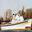

In [22]:
image, _, path = next(iter(dataset))
image

In [9]:
image.width, image.height, image.mode

(32, 32, 'RGB')

In [10]:
image_raw = np.array(image).astype(np.uint8)
image_raw.shape, image_raw[:, :, 0]

((32, 32, 3),
 array([[201, 203, 204, ..., 192, 192, 192],
        [201, 203, 205, ..., 193, 191, 190],
        [202, 203, 204, ..., 195, 192, 189],
        ...,
        [ 70, 163, 209, ..., 167, 131,  37],
        [ 86, 119, 124, ..., 109, 114, 119],
        [105,  96,  80, ...,  59,  74,  73]], dtype=uint8))

------

### ToTensor

In [11]:
image_tensor = transforms.ToTensor()(image_raw)

In [12]:
image_tensor.shape, image_tensor[0, :, :]

(torch.Size([3, 32, 32]),
 tensor([[0.7882, 0.7961, 0.8000,  ..., 0.7529, 0.7529, 0.7529],
         [0.7882, 0.7961, 0.8039,  ..., 0.7569, 0.7490, 0.7451],
         [0.7922, 0.7961, 0.8000,  ..., 0.7647, 0.7529, 0.7412],
         ...,
         [0.2745, 0.6392, 0.8196,  ..., 0.6549, 0.5137, 0.1451],
         [0.3373, 0.4667, 0.4863,  ..., 0.4275, 0.4471, 0.4667],
         [0.4118, 0.3765, 0.3137,  ..., 0.2314, 0.2902, 0.2863]]))

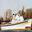

In [13]:
image_pil = transforms.ToPILImage()(image_tensor)
image_pil

In [14]:
image_raw2 = np.array(image_pil).astype(np.uint8)
image_raw2.shape, image_raw2[:, :, 0], image_raw2.max(), image_raw2.min()

((32, 32, 3),
 array([[201, 203, 204, ..., 192, 192, 192],
        [201, 203, 205, ..., 193, 191, 190],
        [202, 203, 204, ..., 195, 192, 189],
        ...,
        [ 70, 163, 209, ..., 167, 131,  37],
        [ 86, 119, 124, ..., 109, 114, 119],
        [105,  96,  80, ...,  59,  74,  73]], dtype=uint8),
 255,
 0)

### Normalize

In [15]:
image_norm = transforms.Normalize(mean, std)(image_tensor)
image_norm.shape, image_norm[0, :, :]

(torch.Size([3, 32, 32]),
 tensor([[ 1.3242,  1.3584,  1.3755,  ...,  1.1700,  1.1700,  1.1700],
         [ 1.3242,  1.3584,  1.3927,  ...,  1.1872,  1.1529,  1.1358],
         [ 1.3413,  1.3584,  1.3755,  ...,  1.2214,  1.1700,  1.1187],
         ...,
         [-0.9192,  0.6734,  1.4612,  ...,  0.7419,  0.1254, -1.4843],
         [-0.6452, -0.0801,  0.0056,  ..., -0.2513, -0.1657, -0.0801],
         [-0.3198, -0.4739, -0.7479,  ..., -1.1075, -0.8507, -0.8678]]))

In [16]:
(image_raw.min(), image_raw.max()), (image_tensor.min(), image_tensor.max()), (image_norm.min(), image_norm.max())

((0, 255), (tensor(0.), tensor(1.)), (tensor(-2.0357), tensor(2.6051)))

### Display

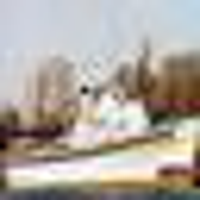

In [17]:
transforms.ToPILImage()(image_raw).resize((200, 200))

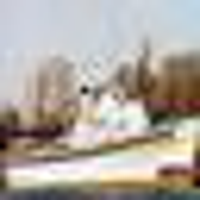

In [18]:
transforms.ToPILImage()(image_tensor).resize((200, 200))

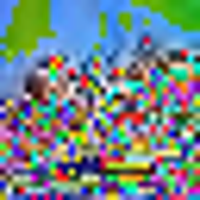

In [19]:
transforms.ToPILImage()(image_norm).resize((200, 200))

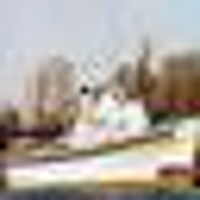

In [20]:
transforms.ToPILImage()(Denormalize(mean, std)(image_norm)).resize((200, 200))